# vCAT MODEL GLM2


# ROI mask specs:
### Hippocampus (FS labels: hippocampus [17, 53])
### Putamen (FS labels: putamen [12, 51])
### Medial PFC (FS labels: rostral anterior cingulate [1026, 2026] & caudal anterior cingulate [1002, 2002])
### Dorsal caudate (hand-drawn)

In [1]:
from os.path import join
from glob import glob
from scipy import stats
from math import sqrt
import nibabel as nb
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("white")
sns.set_palette('muted')

subs = ['sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-010', 
        'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 
        'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 
        'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 
        'sub-028', 'sub-029', 'sub-030', 'sub-031', 'sub-032']

proj_dir = '/home/data/madlab/Mattfeld_vCAT' 
masks = []
copes = []
for sub in subs:
    masks_glob = glob(join(proj_dir, 'derivatives/roi_masks', sub, 'bi-*.nii.gz'))
    masks.append(sorted(masks_glob))
    copes_glob = glob(join(proj_dir, 'derivatives/GLM2/lvl2', sub, 'fixedfx/cope*'))
    copes.append(sorted(copes_glob))
for i, sub in enumerate(subs):
    print(sub, len(copes[i]))

sub-005 22
sub-006 22
sub-007 22
sub-008 22
sub-010 22
sub-012 22
sub-013 22
sub-014 22
sub-015 22
sub-016 22
sub-018 22
sub-019 22
sub-020 22
sub-021 22
sub-022 22
sub-023 22
sub-024 22
sub-025 22
sub-026 22
sub-027 22
sub-028 22
sub-029 22
sub-030 22
sub-031 22
sub-032 22


## Double-check the array indexing for masks and copes

In [2]:
#change first index of cope_files to indicate participant index in sids array
for i, curr_mask in enumerate(masks[0]):
    print(i, masks[0][i].split('/')[-1][:-7].split('_')[0]) 

0 bi-caudate
1 bi-fusiform
2 bi-hippocampus
3 bi-mPFC
4 bi-parahippocampal
5 bi-putamen


In [3]:
for i, curr_cope in enumerate(copes[0]):
    print(i, copes[0][i].split('/')[-1][5:-7]) 

0 AllVsBase
1 allCond_minus_allFixed
2 allCorr_minus_allIncorr
3 allFixed_minus_allCond
4 allIncorr_minus_allCorr
5 all_cond
6 all_corr
7 all_fixed
8 all_incorr
9 condCorr_minus_condIncorr
10 condCorr_minus_fixedCorr
11 condIncorr_minus_condCorr
12 condIncorr_minus_fixedIncorr
13 cond_corr
14 cond_incorr
15 fixedCorr_minus_condCorr
16 fixedCorr_minus_fixedIncorr
17 fixedIncorr_minus_condIncorr
18 fixedIncorr_minus_fixedCorr
19 fixed_corr
20 fixed_incorr
21 remaining


### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [4]:
all_data = {'subjid':[],
            'hp_fixed_corr':[], 'hp_fixed_incorr':[], 'hp_cond_corr':[], 'hp_cond_incorr':[],
            'mpfc_fixed_corr':[], 'mpfc_fixed_incorr':[], 'mpfc_cond_corr':[], 'mpfc_cond_incorr':[],             
            'caud_fixed_corr':[], 'caud_fixed_incorr':[], 'caud_cond_corr':[], 'caud_cond_incorr':[],           
            'put_fixed_corr':[], 'put_fixed_incorr':[], 'put_cond_corr':[], 'put_cond_incorr':[]}

for i in range(len(subs)):
    all_data['subjid'].append(subs[i])
    #ROI masks
    hp_img = nb.load(masks[i][2]) #FS
    mpfc_img = nb.load(masks[i][3]) #FS
    caud_img = nb.load(masks[i][0]) #hand-drawn
    put_img = nb.load(masks[i][5]) #FS
    #copes
    fixed_corr_img = nb.load(copes[i][19])
    fixed_incorr_img = nb.load(copes[i][20])   
    cond_corr_img = nb.load(copes[i][13])
    cond_incorr_img = nb.load(copes[i][14])    
    
    region = ['hp', 'mpfc', 'caud', 'put']
    learn_type = ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']   
    for r in region:
        for l in learn_type:
            data = eval('{0}_img.get_fdata()[{1}_img.get_fdata() > 0.]'.format(l,r))
            all_data['{0}_{1}'.format(r,l)].append(np.mean(data))
    
all_data_df = pd.DataFrame(all_data) #turn entire super-dict into dataframe  

### Region-specific dataframes for producing plots

In [5]:
hp_plot = {}
mpfc_plot = {}
caud_plot = {}
put_plot = {}

subjid = pd.Series(all_data['subjid']) #assign Ss id as row identifier
for i in ['hp', 'mpfc', 'caud', 'put']:
    exec('{0}_plot["fixed_corr"] = all_data_df["{0}_fixed_corr"]'.format(i))
    exec('{0}_plot["fixed_incorr"] = all_data_df["{0}_fixed_incorr"]'.format(i))
    exec('{0}_plot["cond_corr"] = all_data_df["{0}_cond_corr"]'.format(i))
    exec('{0}_plot["cond_incorr"] = all_data_df["{0}_cond_incorr"]'.format(i))
    exec('{0}_plot_df = pd.DataFrame.from_dict({0}_plot).set_index(subjid)'.format(i))

# Hippocampus

In [6]:
hp_plot_df

,fixed_corr,fixed_incorr,cond_corr,cond_incorr
sub-005,1.686967,1.953496,1.486212,1.933822
sub-006,0.661412,0.891969,0.512588,0.634545
sub-007,0.765964,0.956253,0.517301,0.778599
sub-008,1.411978,1.744980,1.428351,1.320509
sub-010,1.018874,1.957184,0.605847,1.063437
sub-012,0.985120,1.292223,0.971256,1.182320
sub-013,0.122976,0.746887,0.333348,0.845667
sub-014,1.426036,1.843314,1.242883,2.240774
sub-015,0.993636,1.128689,0.852755,0.764594
sub-016,0.890416,2.867559,0.578068,0.790046


In [7]:
hp_anova = {'subjid':[], 'trial':[], 'activation':[]} #reorganizing data for Repeated Measures ANOVA

for i in range(len(subs)):
    for k in ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']: #trial type
        hp_anova['subjid'].append(subs[i])
        hp_anova['trial'].append(k)
        hp_anova['activation'].append(hp_plot_df['{0}'.format(k)][i])
df_hp_anova = pd.DataFrame(hp_anova)

In [8]:
df_hp_anova

,subjid,trial,activation
0,sub-005,fixed_corr,1.686967
1,sub-005,fixed_incorr,1.953496
2,sub-005,cond_corr,1.486212
3,sub-005,cond_incorr,1.933822
4,sub-006,fixed_corr,0.661412
...,...,...,...
95,sub-031,cond_incorr,0.978025
96,sub-032,fixed_corr,0.716495
97,sub-032,fixed_incorr,1.115449
98,sub-032,cond_corr,0.806356


Descriptives
Mean / STD fixed_corr:  0.8479634223895566 / 0.5880072582957493
Shapiros fixed_corr:  0.33867591619491577

Mean / STD fixed_incorr:  1.091570798828117 / 0.7271256300794096
Shapiros fixed_incorr:  0.602428674697876

Mean / STD cond_corr:  0.8570357559912906 / 0.619945680102146
Shapiros cond_corr:  0.18616324663162231

Mean / STD cond_incorr:  0.915603601899848 / 0.6291645886440546
Shapiros cond_incorr:  0.28590673208236694

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
trial  3.4603 3.0000 72.0000 0.0207



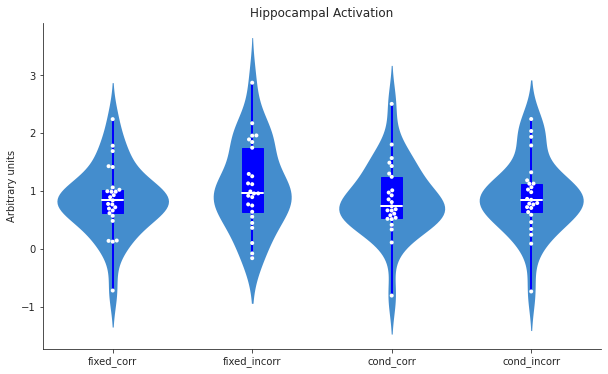

In [9]:
from statsmodels.stats.anova import AnovaRM
print('Descriptives')
for key in hp_plot:
    print('Mean / STD {0}: '.format(key), np.mean(hp_plot['{0}'.format(key)]), "/", np.std(hp_plot['{0}'.format(key)]))  
    if stats.shapiro(hp_plot['{0}'.format(key)])[1] > 0.049:
        print("Shapiros {0}: ".format(key), stats.shapiro(hp_plot['{0}'.format(key)])[1])
    else:
        print("Shapiros {0}: ".format(key), stats.shapiro(hp_plot['{0}'.format(key)])[1], "**")
    print("")    
print(AnovaRM(data=df_hp_anova, depvar='activation', subject='subjid', within=['trial']).fit()) 
    
N = 4
conditions = ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']
allsubjs = [hp_plot['fixed_corr'], hp_plot['fixed_incorr'], hp_plot['cond_corr'], hp_plot['cond_incorr']]
ind = np.arange(N)
fig,ax = plt.subplots(figsize=(10,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#278fea', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,showcaps=False, 
           boxprops=dict(color='blue', facecolor='blue'),
           whiskerprops=dict(color='blue', linewidth=2, linestyle="-"),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
#ax.set_ylim(-0.2,0.8)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
#plt.savefig("/home/arenf001/figs/GLM2_hpc.png", dpi=1000)
plt.show() 

### Hippocampus - Fixed vs. Conditional

HPC FIXED Mean / STD / Shapiros:  0.9697671106088367 / 0.6201746549232102 / 0.9714285731315613
HPC COND Mean / STD / Shapiros:  0.8863196789455692 / 0.599602922353291 / 0.9403707981109619

HPC Fixed vs. Conditional
Ttest_relResult(statistic=1.2951440050964897, pvalue=0.20759122459385265)
Cohen's d =  0.18956195708712034


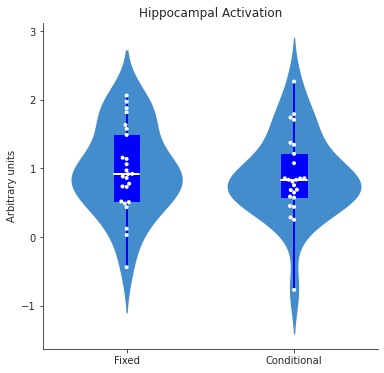

In [10]:
all_fixed = hp_plot_df[['fixed_corr', 'fixed_incorr']].mean(axis=1)
all_fixed = np.array(all_fixed)
all_cond = hp_plot_df[['cond_corr', 'cond_incorr']].mean(axis=1)
all_cond = np.array(all_cond)
print("HPC FIXED Mean / STD / Shapiros: ", np.mean(all_fixed), "/", np.std(all_fixed), "/", stats.shapiro(all_fixed)[0])
print ("HPC COND Mean / STD / Shapiros: ", np.mean(all_cond), "/", np.std(all_cond), "/", stats.shapiro(all_cond)[0])
print("")
print('HPC Fixed vs. Conditional')
if stats.ttest_rel(all_fixed, all_cond)[1] < 0.001:
    print (stats.ttest_rel(all_fixed, all_cond), "**")
elif stats.ttest_rel(all_fixed, all_cond)[1] < 0.0125:
    print (stats.ttest_rel(all_fixed, all_cond), "*")
else:
    print (stats.ttest_rel(all_fixed, all_cond))
cohens_d = ((np.average(all_fixed) - np.average(all_cond)) / (sqrt((np.std(all_fixed, ddof = 1)) 
            ** 2 + np.std(all_cond, ddof = 1) ** 2) / 2))
print ("Cohen's d = ", cohens_d)
N = 2
conditions = ['Fixed', 'Conditional']
allsubjs = [all_fixed, all_cond]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#278fea', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,showcaps=False, 
           boxprops=dict(color='blue', facecolor='blue'),
           whiskerprops=dict(color='blue', linewidth=2, linestyle="-"),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
plt.show()

### Hippocampus - Fixed Correct vs. Fixed Incorrect

HPC Fixed Correct vs. Fixed Incorrect
Ttest_relResult(statistic=-2.6014122624941636, pvalue=0.015654361555527265)
Cohen's d =  -0.5104873976478232


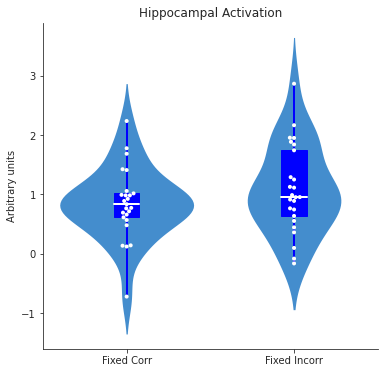

In [11]:
print('HPC Fixed Correct vs. Fixed Incorrect')
if stats.ttest_rel(hp_plot_df['fixed_corr'], hp_plot_df['fixed_incorr'])[1] < 0.001:
    print (stats.ttest_rel(hp_plot_df['fixed_corr'], hp_plot_df['fixed_incorr']), "**")
elif stats.ttest_rel(hp_plot_df['fixed_corr'], hp_plot_df['fixed_incorr'])[1] < 0.0125:
    print (stats.ttest_rel(hp_plot_df['fixed_corr'], hp_plot_df['fixed_incorr']), "*")
else:
    print (stats.ttest_rel(hp_plot_df['fixed_corr'], hp_plot_df['fixed_incorr']))
cohens_d=((np.average(hp_plot_df['fixed_corr'])-np.average(hp_plot_df['fixed_incorr']))
          /(sqrt((np.std(hp_plot_df['fixed_corr'],ddof=1)) 
           **2+np.std(hp_plot_df['fixed_incorr'],ddof = 1)**2)/2))
print("Cohen's d = ", cohens_d)
N = 2
conditions = ['Fixed Corr', 'Fixed Incorr']
allsubjs = [hp_plot_df['fixed_corr'], hp_plot_df['fixed_incorr']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#278fea', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,showcaps=False, 
           boxprops=dict(color='blue', facecolor='blue'),
           whiskerprops=dict(color='blue', linewidth=2, linestyle="-"),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
plt.show()

### Hippocampus - Conditional Correct vs. Conditional Incorrect

HPC Cond Correct vs. Cond Incorrect
Ttest_relResult(statistic=-0.8205605057376357, pvalue=0.41997251148054004)
Cohen's d =  -0.1299353303456015


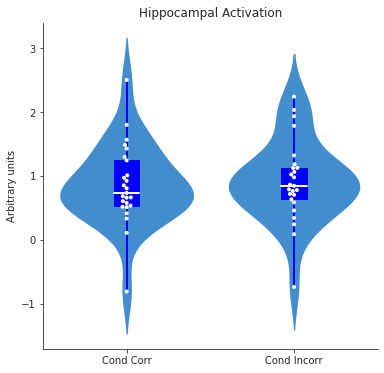

In [12]:
print('HPC Cond Correct vs. Cond Incorrect')
if stats.ttest_rel(hp_plot_df['cond_corr'], hp_plot_df['cond_incorr'])[1] < 0.001:
    print (stats.ttest_rel(hp_plot_df['cond_corr'], hp_plot_df['cond_incorr']), "**")
elif stats.ttest_rel(hp_plot_df['cond_corr'], hp_plot_df['cond_incorr'])[1] < 0.0125:
    print (stats.ttest_rel(hp_plot_df['cond_corr'], hp_plot_df['cond_incorr']), "*")
else:
    print (stats.ttest_rel(hp_plot_df['cond_corr'], hp_plot_df['cond_incorr']))
cohens_d=((np.average(hp_plot_df['cond_corr'])-np.average(hp_plot_df['cond_incorr']))
          /(sqrt((np.std(hp_plot_df['cond_corr'],ddof=1)) 
           **2+np.std(hp_plot_df['cond_incorr'],ddof = 1)**2)/2))
print("Cohen's d = ", cohens_d)
N = 2
conditions = ['Cond Corr', 'Cond Incorr']
allsubjs = [hp_plot_df['cond_corr'], hp_plot_df['cond_incorr']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#278fea', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,showcaps=False, 
           boxprops=dict(color='blue', facecolor='blue'),
           whiskerprops=dict(color='blue', linewidth=2, linestyle="-"),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
plt.show()

# Medial PFC

In [13]:
mpfc_plot_df

,fixed_corr,fixed_incorr,cond_corr,cond_incorr
sub-005,-0.770522,-0.836712,-0.615094,-0.970406
sub-006,-0.387007,-0.464041,-0.291538,-0.580069
sub-007,-0.177182,-0.288099,-0.441622,-0.427329
sub-008,0.022539,0.169551,-0.173882,-0.229240
sub-010,-0.361387,-0.277479,-0.019436,-0.414880
sub-012,-0.616466,-0.628559,-0.191745,-0.678996
sub-013,-0.441606,-0.427686,-0.405845,-0.470382
sub-014,-0.680608,-0.556880,-0.430639,0.103846
sub-015,-0.213064,-0.533329,-0.078667,-0.520579
sub-016,-0.311387,-0.225552,-0.306653,-0.350426


In [14]:
mpfc_anova = {'subjid':[], 'trial':[], 'activation':[]} #reorganizing data for Repeated Measures ANOVA

for i in range(len(subs)):
    for k in ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']: #trial type
        mpfc_anova['subjid'].append(subs[i])
        mpfc_anova['trial'].append(k)
        mpfc_anova['activation'].append(mpfc_plot_df['{0}'.format(k)][i])
df_mpfc_anova = pd.DataFrame(mpfc_anova)

In [15]:
df_mpfc_anova

,subjid,trial,activation
0,sub-005,fixed_corr,-0.770522
1,sub-005,fixed_incorr,-0.836712
2,sub-005,cond_corr,-0.615094
3,sub-005,cond_incorr,-0.970406
4,sub-006,fixed_corr,-0.387007
...,...,...,...
95,sub-031,cond_incorr,-0.537684
96,sub-032,fixed_corr,-0.310219
97,sub-032,fixed_incorr,-0.285593
98,sub-032,cond_corr,-0.194018


Descriptives
Mean / STD fixed_corr:  -0.43472831021224695 / 0.22371620707443612
Shapiros fixed_corr:  0.9990648627281189

Mean / STD fixed_incorr:  -0.5349105041127771 / 0.29355032347364046
Shapiros fixed_incorr:  0.3691745698451996

Mean / STD cond_corr:  -0.25564756482781115 / 0.15329277071438774
Shapiros cond_corr:  0.8018696308135986

Mean / STD cond_incorr:  -0.45147252274939426 / 0.22748176631621192
Shapiros cond_incorr:  0.9876683354377747

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
trial 12.1325 3.0000 72.0000 0.0000



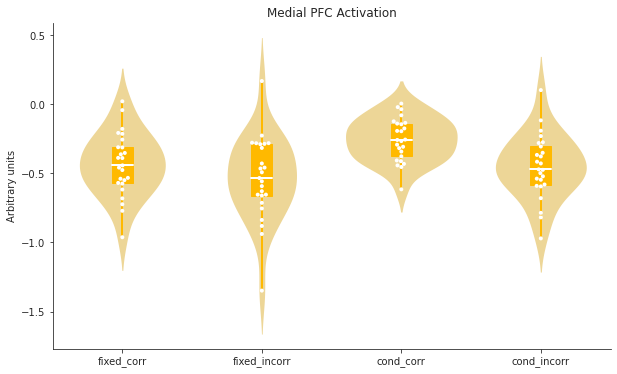

In [16]:
from statsmodels.stats.anova import AnovaRM
print('Descriptives')
for key in mpfc_plot:
    print('Mean / STD {0}: '.format(key), np.mean(mpfc_plot['{0}'.format(key)]), "/", np.std(mpfc_plot['{0}'.format(key)]))  
    if stats.shapiro(mpfc_plot['{0}'.format(key)])[1] > 0.049:
        print("Shapiros {0}: ".format(key), stats.shapiro(mpfc_plot['{0}'.format(key)])[1])
    else:
        print("Shapiros {0}: ".format(key), stats.shapiro(mpfc_plot['{0}'.format(key)])[1], "**")
    print("")    
print(AnovaRM(data=df_mpfc_anova, depvar='activation', subject='subjid', within=['trial']).fit()) 
    
N = 4
conditions = ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']
allsubjs = [mpfc_plot['fixed_corr'], mpfc_plot['fixed_incorr'], mpfc_plot['cond_corr'], mpfc_plot['cond_incorr']]
ind = np.arange(N)
fig,ax = plt.subplots(figsize=(10,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#ffde85', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='#ffb900', facecolor='#ffb900'),
           whiskerprops=dict(color='#ffb900', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Medial PFC Activation")
plt.show() 

### Medial PFC - Fixed vs. Conditional

mPFC FIXED Mean / STD / Shapiros:  -0.48481940716251193 / 0.24892107922409754 / 0.9711843132972717
mPFC COND Mean / STD / Shapiros:  -0.3535600437886027 / 0.1513048717173616 / 0.9268323183059692

mPFC Fixed vs. Conditional
Ttest_relResult(statistic=-3.2080037541232143, pvalue=0.0037669597476670314) *
Cohen's d =  -0.8829935372010432


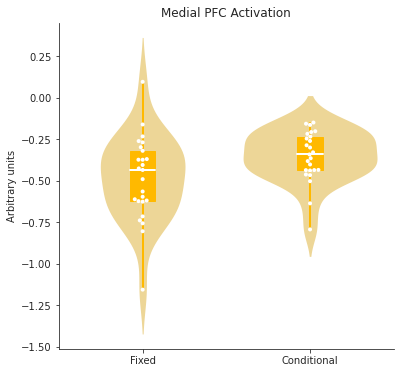

In [17]:
all_fixed = mpfc_plot_df[['fixed_corr', 'fixed_incorr']].mean(axis=1)
all_fixed = np.array(all_fixed)
all_cond = mpfc_plot_df[['cond_corr', 'cond_incorr']].mean(axis=1)
all_cond = np.array(all_cond)
print("mPFC FIXED Mean / STD / Shapiros: ", np.mean(all_fixed), "/", np.std(all_fixed), "/", stats.shapiro(all_fixed)[0])
print ("mPFC COND Mean / STD / Shapiros: ", np.mean(all_cond), "/", np.std(all_cond), "/", stats.shapiro(all_cond)[0])
print("")
print('mPFC Fixed vs. Conditional')
if stats.ttest_rel(all_fixed, all_cond)[1] < 0.001:
    print (stats.ttest_rel(all_fixed, all_cond), "**")
elif stats.ttest_rel(all_fixed, all_cond)[1] < 0.0125:
    print (stats.ttest_rel(all_fixed, all_cond), "*")
else:
    print (stats.ttest_rel(all_fixed, all_cond))
cohens_d = ((np.average(all_fixed) - np.average(all_cond)) / (sqrt((np.std(all_fixed, ddof = 1)) 
            ** 2 + np.std(all_cond, ddof = 1) ** 2) / 2))
print ("Cohen's d = ", cohens_d)
N = 2
conditions = ['Fixed', 'Conditional']
allsubjs = [all_fixed, all_cond]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#ffde85', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='#ffb900', facecolor='#ffb900'),
           whiskerprops=dict(color='#ffb900', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Medial PFC Activation")
plt.show()

### Medial PFC - Fixed Correct vs. Fixed Incorrect

mPFC Fixed Correct vs. Fixed Incorrect
Ttest_relResult(statistic=3.1295061672306956, pvalue=0.004553017051158632) *
Cohen's d =  0.5319055755530557


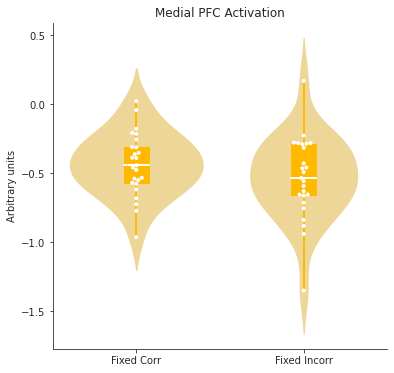

In [18]:
print('mPFC Fixed Correct vs. Fixed Incorrect')
if stats.ttest_rel(mpfc_plot_df['fixed_corr'], mpfc_plot_df['fixed_incorr'])[1] < 0.001:
    print (stats.ttest_rel(mpfc_plot_df['fixed_corr'], mpfc_plot_df['fixed_incorr']), "**")
elif stats.ttest_rel(mpfc_plot_df['fixed_corr'], mpfc_plot_df['fixed_incorr'])[1] < 0.0125:
    print (stats.ttest_rel(mpfc_plot_df['fixed_corr'], mpfc_plot_df['fixed_incorr']), "*")
else:
    print (stats.ttest_rel(mpfc_plot_df['fixed_corr'], mpfc_plot_df['fixed_incorr']))
cohens_d=((np.average(mpfc_plot_df['fixed_corr'])-np.average(mpfc_plot_df['fixed_incorr']))
          /(sqrt((np.std(mpfc_plot_df['fixed_corr'],ddof=1)) 
           **2+np.std(mpfc_plot_df['fixed_incorr'],ddof = 1)**2)/2))
print("Cohen's d = ", cohens_d)
N = 2
conditions = ['Fixed Corr', 'Fixed Incorr']
allsubjs = [mpfc_plot_df['fixed_corr'], mpfc_plot_df['fixed_incorr']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#ffde85', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='#ffb900', facecolor='#ffb900'),
           whiskerprops=dict(color='#ffb900', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Medial PFC Activation")
plt.show()

### Medial PFC - Conditional Correct vs. Conditional Incorrect

mPFC Cond Correct vs. Cond Incorrect
Ttest_relResult(statistic=3.9522106914709156, pvalue=0.000594488161205233) **
Cohen's d =  1.398911157130061


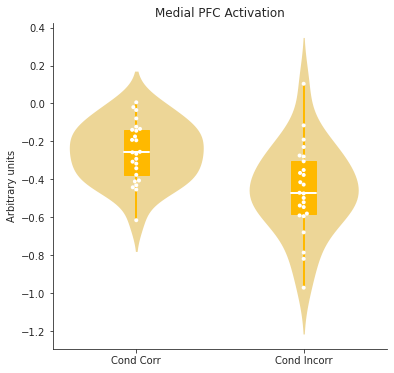

In [19]:
print('mPFC Cond Correct vs. Cond Incorrect')
if stats.ttest_rel(mpfc_plot_df['cond_corr'], mpfc_plot_df['cond_incorr'])[1] < 0.001:
    print (stats.ttest_rel(mpfc_plot_df['cond_corr'], mpfc_plot_df['cond_incorr']), "**")
elif stats.ttest_rel(mpfc_plot_df['cond_corr'], mpfc_plot_df['cond_incorr'])[1] < 0.0125:
    print (stats.ttest_rel(mpfc_plot_df['cond_corr'], mpfc_plot_df['cond_incorr']), "*")
else:
    print (stats.ttest_rel(mpfc_plot_df['cond_corr'], mpfc_plot_df['cond_incorr']))
cohens_d=((np.average(mpfc_plot_df['cond_corr'])-np.average(mpfc_plot_df['cond_incorr']))
          /(sqrt((np.std(mpfc_plot_df['cond_corr'],ddof=1)) 
           **2+np.std(mpfc_plot_df['cond_incorr'],ddof = 1)**2)/2))
print("Cohen's d = ", cohens_d)
N = 2
conditions = ['Cond Corr', 'Cond Incorr']
allsubjs = [mpfc_plot_df['cond_corr'], mpfc_plot_df['cond_incorr']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#ffde85', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='#ffb900', facecolor='#ffb900'),
           whiskerprops=dict(color='#ffb900', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Medial PFC Activation")
plt.show()

# Caudate

In [20]:
caud_plot_df

,fixed_corr,fixed_incorr,cond_corr,cond_incorr
sub-005,-0.087741,0.040748,-0.052869,-0.077587
sub-006,-0.000806,-0.001414,-0.000812,-0.000803
sub-007,-0.109421,-0.144937,-0.146178,-0.200699
sub-008,-0.171268,-0.019723,-0.063887,-0.228132
sub-010,-0.813338,-0.123459,-0.416083,-0.057788
sub-012,-0.754947,-0.919235,-0.388452,-0.923782
sub-013,-0.748946,-0.759925,-0.544152,-0.481476
sub-014,-0.161248,0.046070,-0.650329,-0.332146
sub-015,-0.137333,-0.019059,-0.157923,-0.356394
sub-016,-0.433642,0.090541,-0.147688,-0.540441


In [21]:
caud_anova = {'subjid':[], 'trial':[], 'activation':[]} #reorganizing data for Repeated Measures ANOVA

for i in range(len(subs)):
    for k in ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']: #trial type
        caud_anova['subjid'].append(subs[i])
        caud_anova['trial'].append(k)
        caud_anova['activation'].append(caud_plot_df['{0}'.format(k)][i])
df_caud_anova = pd.DataFrame(caud_anova)

In [22]:
df_caud_anova

,subjid,trial,activation
0,sub-005,fixed_corr,-0.087741
1,sub-005,fixed_incorr,0.040748
2,sub-005,cond_corr,-0.052869
3,sub-005,cond_incorr,-0.077587
4,sub-006,fixed_corr,-0.000806
...,...,...,...
95,sub-031,cond_incorr,-0.602657
96,sub-032,fixed_corr,-0.227045
97,sub-032,fixed_incorr,-0.007195
98,sub-032,cond_corr,-0.076930


Descriptives
Mean / STD fixed_corr:  -0.3379376681756481 / 0.3171913422251383
Shapiros fixed_corr:  0.0019444084027782083 **

Mean / STD fixed_incorr:  -0.32473846738643286 / 0.39111356003134623
Shapiros fixed_incorr:  0.001186995068565011 **

Mean / STD cond_corr:  -0.23809347319134222 / 0.23459064606162597
Shapiros cond_corr:  0.03246411308646202 **

Mean / STD cond_incorr:  -0.36631293817850086 / 0.35497916944747715
Shapiros cond_incorr:  0.04459275305271149 **

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
trial  2.2119 3.0000 72.0000 0.0941



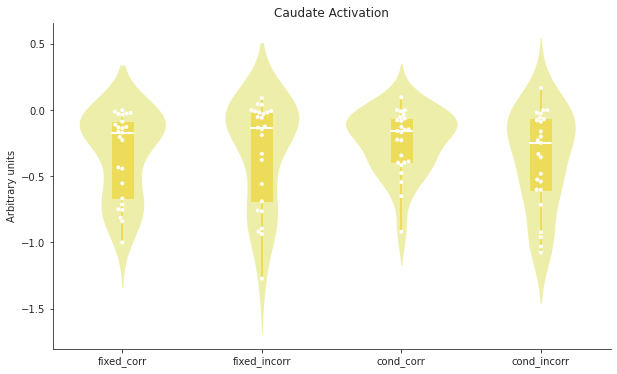

In [23]:
from statsmodels.stats.anova import AnovaRM
print('Descriptives')
for key in caud_plot:
    print('Mean / STD {0}: '.format(key), np.mean(caud_plot['{0}'.format(key)]), "/", np.std(caud_plot['{0}'.format(key)]))  
    if stats.shapiro(caud_plot['{0}'.format(key)])[1] > 0.049:
        print("Shapiros {0}: ".format(key), stats.shapiro(caud_plot['{0}'.format(key)])[1])
    else:
        print("Shapiros {0}: ".format(key), stats.shapiro(caud_plot['{0}'.format(key)])[1], "**")
    print("")    
print(AnovaRM(data=df_caud_anova, depvar='activation', subject='subjid', within=['trial']).fit()) 
    
N = 4
conditions = ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']
allsubjs = [caud_plot['fixed_corr'], caud_plot['fixed_incorr'], caud_plot['cond_corr'], caud_plot['cond_incorr']]
ind = np.arange(N)
fig,ax = plt.subplots(figsize=(10,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#fcfc9d', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='#eddc5a', facecolor='#eddc5a'),
           whiskerprops=dict(color='#eddc5a', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.show() 

### Caudate - Fixed vs. Conditional

Caudate FIXED Mean / STD / Shapiros:  -0.3313380677810405 / 0.33565823774831033 / 0.8291032910346985
Caudate COND Mean / STD / Shapiros:  -0.3022032056849215 / 0.2694261759455872 / 0.926112949848175

Caudate Fixed vs. Conditional
Ttest_relResult(statistic=-0.7603302181615961, pvalue=0.4544624310259203)
Cohen's d =  -0.13264514626751414


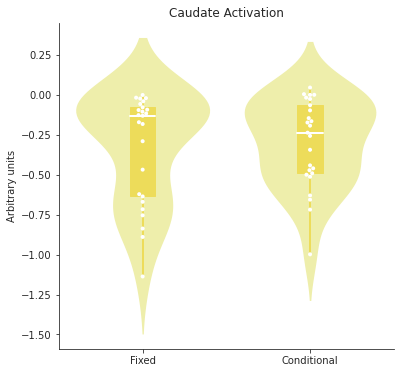

In [24]:
all_fixed = caud_plot_df[['fixed_corr', 'fixed_incorr']].mean(axis=1)
all_fixed = np.array(all_fixed)
all_cond = caud_plot_df[['cond_corr', 'cond_incorr']].mean(axis=1)
all_cond = np.array(all_cond)
print("Caudate FIXED Mean / STD / Shapiros: ", np.mean(all_fixed), "/", np.std(all_fixed), "/", stats.shapiro(all_fixed)[0])
print ("Caudate COND Mean / STD / Shapiros: ", np.mean(all_cond), "/", np.std(all_cond), "/", stats.shapiro(all_cond)[0])
print("")
print('Caudate Fixed vs. Conditional')
if stats.ttest_rel(all_fixed, all_cond)[1] < 0.001:
    print (stats.ttest_rel(all_fixed, all_cond), "**")
elif stats.ttest_rel(all_fixed, all_cond)[1] < 0.0125:
    print (stats.ttest_rel(all_fixed, all_cond), "*")
else:
    print (stats.ttest_rel(all_fixed, all_cond))
cohens_d = ((np.average(all_fixed) - np.average(all_cond)) / (sqrt((np.std(all_fixed, ddof = 1)) 
            ** 2 + np.std(all_cond, ddof = 1) ** 2) / 2))
print ("Cohen's d = ", cohens_d)
N = 2
conditions = ['Fixed', 'Conditional']
allsubjs = [all_fixed, all_cond]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#fcfc9d', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='#eddc5a', facecolor='#eddc5a'),
           whiskerprops=dict(color='#eddc5a', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.show()

### Caudate - Fixed Correct vs. Fixed Incorrect

Caudate Fixed Correct vs. Fixed Incorrect
Ttest_relResult(statistic=-0.2720508582384681, pvalue=0.7879096541067346)
Cohen's d =  -0.05136361808729733


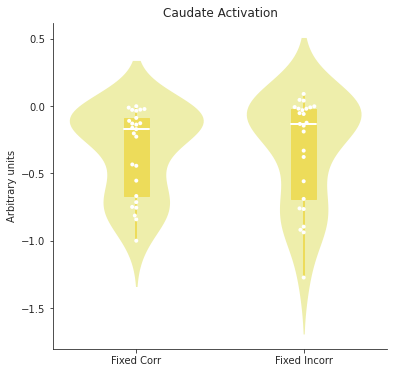

In [25]:
print('Caudate Fixed Correct vs. Fixed Incorrect')
if stats.ttest_rel(caud_plot_df['fixed_corr'], caud_plot_df['fixed_incorr'])[1] < 0.001:
    print (stats.ttest_rel(caud_plot_df['fixed_corr'], caud_plot_df['fixed_incorr']), "**")
elif stats.ttest_rel(caud_plot_df['fixed_corr'], caud_plot_df['fixed_incorr'])[1] < 0.0125:
    print (stats.ttest_rel(caud_plot_df['fixed_corr'], caud_plot_df['fixed_incorr']), "*")
else:
    print (stats.ttest_rel(caud_plot_df['fixed_corr'], caud_plot_df['fixed_incorr']))
cohens_d=((np.average(caud_plot_df['fixed_corr'])-np.average(caud_plot_df['fixed_incorr']))
          /(sqrt((np.std(caud_plot_df['fixed_corr'],ddof=1)) 
           **2+np.std(caud_plot_df['fixed_incorr'],ddof = 1)**2)/2))
print("Cohen's d = ", cohens_d)
N = 2
conditions = ['Fixed Corr', 'Fixed Incorr']
allsubjs = [caud_plot_df['fixed_corr'], caud_plot_df['fixed_incorr']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#fcfc9d', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='#eddc5a', facecolor='#eddc5a'),
           whiskerprops=dict(color='#eddc5a', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.show()

### Caudate - Conditional Correct vs. Conditional Incorrect

Caudate Cond Correct vs. Cond Incorrect
Ttest_relResult(statistic=2.3454544710230505, pvalue=0.027602957949125474)
Cohen's d =  0.5905119972223792


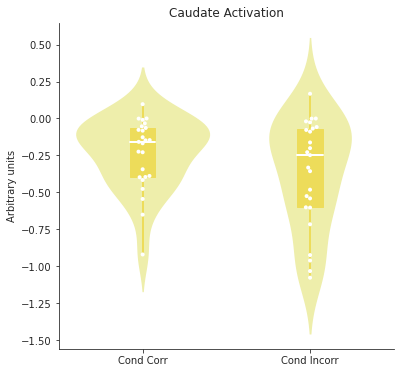

In [26]:
print('Caudate Cond Correct vs. Cond Incorrect')
if stats.ttest_rel(caud_plot_df['cond_corr'], caud_plot_df['cond_incorr'])[1] < 0.001:
    print (stats.ttest_rel(caud_plot_df['cond_corr'], caud_plot_df['cond_incorr']), "**")
elif stats.ttest_rel(caud_plot_df['cond_corr'], caud_plot_df['cond_incorr'])[1] < 0.0125:
    print (stats.ttest_rel(caud_plot_df['cond_corr'], caud_plot_df['cond_incorr']), "*")
else:
    print (stats.ttest_rel(caud_plot_df['cond_corr'], caud_plot_df['cond_incorr']))
cohens_d=((np.average(caud_plot_df['cond_corr'])-np.average(caud_plot_df['cond_incorr']))
          /(sqrt((np.std(caud_plot_df['cond_corr'],ddof=1)) 
           **2+np.std(caud_plot_df['cond_incorr'],ddof = 1)**2)/2))
print("Cohen's d = ", cohens_d)
N = 2
conditions = ['Cond Corr', 'Cond Incorr']
allsubjs = [caud_plot_df['cond_corr'], caud_plot_df['cond_incorr']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#fcfc9d', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='#eddc5a', facecolor='#eddc5a'),
           whiskerprops=dict(color='#eddc5a', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.show()

# Putamen

In [27]:
put_plot_df

,fixed_corr,fixed_incorr,cond_corr,cond_incorr
sub-005,-1.097767,-1.161492,-1.168552,-1.136154
sub-006,-0.447125,-0.527396,-0.529183,-0.886726
sub-007,-0.363981,-0.605280,-0.822925,-0.693506
sub-008,-0.377133,-0.873820,-0.483544,-1.059647
sub-010,-0.959580,0.926406,-0.414130,0.427936
sub-012,-1.001751,-0.840365,-0.937438,-1.064494
sub-013,-1.034639,-0.345845,-0.865427,-0.303374
sub-014,-1.203908,-0.413184,-1.735676,-0.189464
sub-015,-0.282898,-0.202494,-0.597133,-0.635434
sub-016,-0.823537,-0.163908,-0.850049,-0.452679


In [28]:
put_anova = {'subjid':[], 'trial':[], 'activation':[]} #reorganizing data for Repeated Measures ANOVA

for i in range(len(subs)):
    for k in ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']: #trial type
        put_anova['subjid'].append(subs[i])
        put_anova['trial'].append(k)
        put_anova['activation'].append(put_plot_df['{0}'.format(k)][i])
df_put_anova = pd.DataFrame(put_anova)

In [29]:
df_put_anova

,subjid,trial,activation
0,sub-005,fixed_corr,-1.097767
1,sub-005,fixed_incorr,-1.161492
2,sub-005,cond_corr,-1.168552
3,sub-005,cond_incorr,-1.136154
4,sub-006,fixed_corr,-0.447125
...,...,...,...
95,sub-031,cond_incorr,-0.511042
96,sub-032,fixed_corr,-0.878719
97,sub-032,fixed_incorr,-0.383929
98,sub-032,cond_corr,-0.538505


Descriptives
Mean / STD fixed_corr:  -0.7828914491419005 / 0.2907175129292242
Shapiros fixed_corr:  0.2795862853527069

Mean / STD fixed_incorr:  -0.6814136165587428 / 0.558345276899407
Shapiros fixed_incorr:  0.11352609843015671

Mean / STD cond_corr:  -0.6816310848897601 / 0.3287766244701681
Shapiros cond_corr:  0.02682356908917427 **

Mean / STD cond_incorr:  -0.5419613872645447 / 0.40112002880588254
Shapiros cond_incorr:  0.7570861577987671

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
trial  1.8969 3.0000 72.0000 0.1378



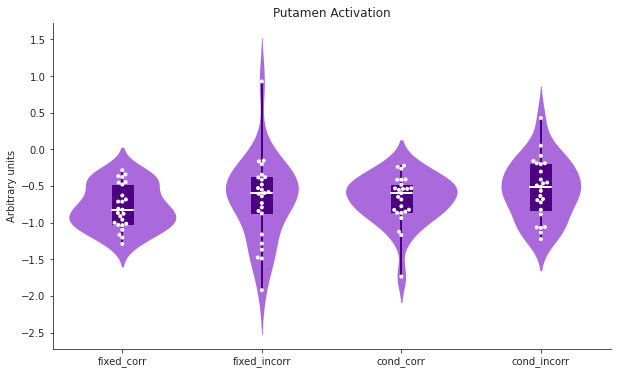

In [30]:
from statsmodels.stats.anova import AnovaRM
print('Descriptives')
for key in put_plot:
    print('Mean / STD {0}: '.format(key), np.mean(put_plot['{0}'.format(key)]), "/", np.std(put_plot['{0}'.format(key)]))  
    if stats.shapiro(put_plot['{0}'.format(key)])[1] > 0.049:
        print("Shapiros {0}: ".format(key), stats.shapiro(put_plot['{0}'.format(key)])[1])
    else:
        print("Shapiros {0}: ".format(key), stats.shapiro(put_plot['{0}'.format(key)])[1], "**")
    print("")    
print(AnovaRM(data=df_put_anova, depvar='activation', subject='subjid', within=['trial']).fit()) 
    
N = 4
conditions = ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr']
allsubjs = [put_plot['fixed_corr'], put_plot['fixed_incorr'], put_plot['cond_corr'], put_plot['cond_incorr']]
ind = np.arange(N)
fig,ax = plt.subplots(figsize=(10,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#af52f4', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='indigo', facecolor='indigo'),
           whiskerprops=dict(color='indigo', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.show() 

### Putamen - Fixed vs. Conditional

Putamen FIXED Mean / STD / Shapiros:  -0.7321525328503217 / 0.35723659516594486 / 0.9661865830421448
Putamen COND Mean / STD / Shapiros:  -0.6117962360771525 / 0.28216792946274877 / 0.9785920977592468

Putamen Fixed vs. Conditional
Ttest_relResult(statistic=-1.6946999354445633, pvalue=0.10307114585705562)
Cohen's d =  -0.5180850592824326


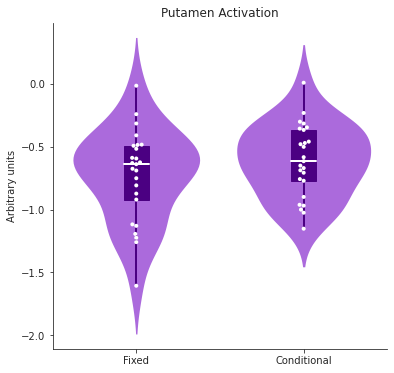

In [31]:
all_fixed = put_plot_df[['fixed_corr', 'fixed_incorr']].mean(axis=1)
all_fixed = np.array(all_fixed)
all_cond = put_plot_df[['cond_corr', 'cond_incorr']].mean(axis=1)
all_cond = np.array(all_cond)
print("Putamen FIXED Mean / STD / Shapiros: ", np.mean(all_fixed), "/", np.std(all_fixed), "/", stats.shapiro(all_fixed)[0])
print ("Putamen COND Mean / STD / Shapiros: ", np.mean(all_cond), "/", np.std(all_cond), "/", stats.shapiro(all_cond)[0])
print("")
print('Putamen Fixed vs. Conditional')
if stats.ttest_rel(all_fixed, all_cond)[1] < 0.001:
    print (stats.ttest_rel(all_fixed, all_cond), "**")
elif stats.ttest_rel(all_fixed, all_cond)[1] < 0.0125:
    print (stats.ttest_rel(all_fixed, all_cond), "*")
else:
    print (stats.ttest_rel(all_fixed, all_cond))
cohens_d = ((np.average(all_fixed) - np.average(all_cond)) / (sqrt((np.std(all_fixed, ddof = 1)) 
            ** 2 + np.std(all_cond, ddof = 1) ** 2) / 2))
print ("Cohen's d = ", cohens_d)
N = 2
conditions = ['Fixed', 'Conditional']
allsubjs = [all_fixed, all_cond]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#af52f4', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='indigo', facecolor='indigo'),
           whiskerprops=dict(color='indigo', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.show()

### Putamen - Fixed Correct vs. Fixed Incorrect

Putamen Fixed Correct vs. Fixed Incorrect
Ttest_relResult(statistic=-0.9360645985631205, pvalue=0.35856416680850967)
Cohen's d =  -0.3158954156402438


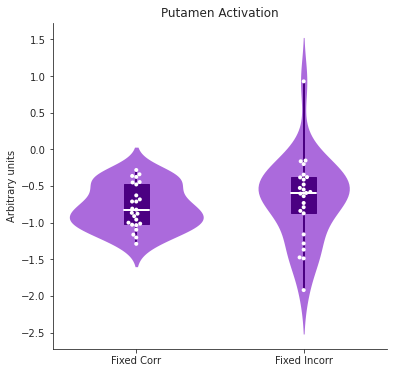

In [32]:
print('Putamen Fixed Correct vs. Fixed Incorrect')
if stats.ttest_rel(put_plot_df['fixed_corr'], put_plot_df['fixed_incorr'])[1] < 0.001:
    print (stats.ttest_rel(put_plot_df['fixed_corr'], put_plot_df['fixed_incorr']), "**")
elif stats.ttest_rel(put_plot_df['fixed_corr'], put_plot_df['fixed_incorr'])[1] < 0.0125:
    print (stats.ttest_rel(put_plot_df['fixed_corr'], put_plot_df['fixed_incorr']), "*")
else:
    print (stats.ttest_rel(put_plot_df['fixed_corr'], put_plot_df['fixed_incorr']))
cohens_d=((np.average(put_plot_df['fixed_corr'])-np.average(put_plot_df['fixed_incorr']))
          /(sqrt((np.std(put_plot_df['fixed_corr'],ddof=1)) 
           **2+np.std(put_plot_df['fixed_incorr'],ddof = 1)**2)/2))
print("Cohen's d = ", cohens_d)
N = 2
conditions = ['Fixed Corr', 'Fixed Incorr']
allsubjs = [put_plot_df['fixed_corr'], put_plot_df['fixed_incorr']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#af52f4', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='indigo', facecolor='indigo'),
           whiskerprops=dict(color='indigo', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.show()

### Putamen - Conditional Correct vs. Conditional Incorrect

Putamen Cond Correct vs. Cond Incorrect
Ttest_relResult(statistic=-1.4604372567027686, pvalue=0.15713821252811688)
Cohen's d =  -0.5277140423684181


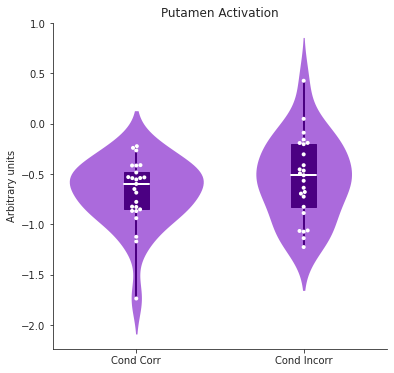

In [33]:
print('Putamen Cond Correct vs. Cond Incorrect')
if stats.ttest_rel(put_plot_df['cond_corr'], put_plot_df['cond_incorr'])[1] < 0.001:
    print (stats.ttest_rel(put_plot_df['cond_corr'], put_plot_df['cond_incorr']), "**")
elif stats.ttest_rel(put_plot_df['cond_corr'], put_plot_df['cond_incorr'])[1] < 0.0125:
    print (stats.ttest_rel(put_plot_df['cond_corr'], put_plot_df['cond_incorr']), "*")
else:
    print (stats.ttest_rel(put_plot_df['cond_corr'], put_plot_df['cond_incorr']))
cohens_d=((np.average(put_plot_df['cond_corr'])-np.average(put_plot_df['cond_incorr']))
          /(sqrt((np.std(put_plot_df['cond_corr'],ddof=1)) 
           **2+np.std(put_plot_df['cond_incorr'],ddof = 1)**2)/2))
print("Cohen's d = ", cohens_d)
N = 2
conditions = ['Cond Corr', 'Cond Incorr']
allsubjs = [put_plot_df['cond_corr'], put_plot_df['cond_incorr']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (6,6))
sns.despine(top=True)
sns.violinplot(data=allsubjs, color='#af52f4', inner=None, linewidth=0, saturation=0.7)
ax.boxplot(allsubjs, whis=[0,100], positions=ind, widths=0.15, patch_artist=True,
           showcaps=False, boxprops=dict(color='indigo', facecolor='indigo'),
           whiskerprops=dict(color='indigo', linewidth=2, linestyle='-'),
           medianprops=dict(color='w', linewidth=2))
sns.swarmplot(data=allsubjs, size=4, color='white', edgecolor='gray')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.show()